In [14]:
import tensorflow as tf

In [2]:
import cv2

In [6]:
img = cv2.imread("D:/images/girl.jpg",1)
cv2.imshow("imge",img) 
cv2.imwrite("compactImage.png",img,[int(cv2.IMWRITE_PNG_COMPRESSION), 9])
cv2.waitKey(0)

-1

In [11]:
data1 = tf.Variable(10,name='var')
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

d1 = tf.constant(2)
d2 = tf.constant(4)
dadd = tf.add(d1,d2)
dmulti= tf.multiply(d1,d2)
with tf.Session() as sess:
    print(sess.run(dadd))

6


In [12]:
da1= tf.placeholder(tf.float32)
da2 = tf.placeholder(tf.float32)
dadd = tf.add(da1,da2)
with tf.Session() as sess:
    print(sess.run(dadd,feed_dict = {da1:6,da2:2}))
    print('endl')

8.0
endl


In [25]:
import tensorflow as tf
data1 = tf.constant([[6,6]])
data2 = tf.constant([[2],
                     [2]])
data3 = tf.constant([[3,3]])
data4 = tf.constant([[1,2],
                     [3,4],
                     [5,6]])
print(data4.shape)
matMul = tf.matmul(data1,data2)
matMu2 = tf.multiply(data1,data2)
matAdd = tf.add(data1,data3)
with tf.Session() as sess:
    print(sess.run(matMul))
    print(sess.run(matMu2))
    print(sess.run(matAdd))
    print(sess.run([matMul,matMu2]))

(3, 2)
[array([[24]]), array([[12, 12],
       [12, 12]])]


In [33]:
mat0 = tf.constant([[0,0,0],[0,0,0]])
mat1 = tf.zeros([2,3])
mat2 = tf.ones([3,2])
mat3 = tf.linspace(0.0,2.0,11)
mat4 = tf.zeros_like(mat1)
mat5 = tf.random_uniform([3,2])
with tf.Session() as sess:
    print(sess.run(mat0))
    print(sess.run(mat1))
    print(sess.run(mat2))
    print(sess.run(mat3))
    print(sess.run(mat4))
    print(sess.run(mat5))

[[0 0 0]
 [0 0 0]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0.        0.2       0.4       0.6       0.8       1.        1.2
 1.4       1.6       1.8000001 2.       ]
[[0. 0. 0.]
 [0. 0. 0.]]
[[0.07321537 0.8617642 ]
 [0.81139743 0.9739672 ]
 [0.83370304 0.8699341 ]]


In [36]:
import numpy as np
data1 = np.array([1,2,3,4,5])
print(data1)

data2 = np.array([[1,2],
                  [3,4]])
print(data2)
data2[1,0] = 5
print(data2)

[1 2 3 4 5]
[[1 2]
 [3 4]]
[[1 2]
 [5 4]]


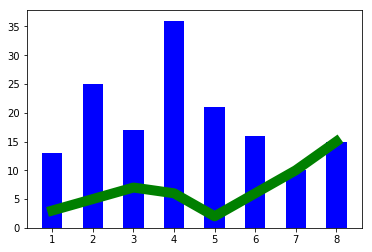

In [40]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([3,5,7,6,2,6,10,15])
plt.plot(x,y,'r')#折线 
plt.plot(x,y,'g',lw=10)
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([13,25,17,36,21,16,10,15])
plt.bar(x,y,0.5,alpha=1,color='b')
plt.show()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


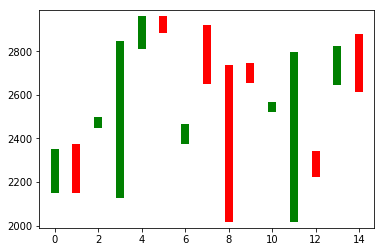

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2169 ,2358 ,2464 ,2145 ,2827 ,2942 ,2391 ,2902 ,2716 ,2726 ,2538 ,2035 ,2322 ,2664 ,2859 ]);
beginPrice = np.array([2334 ,2169 ,2478 ,2827 ,2942 ,2902 ,2447 ,2667 ,2035 ,2673 ,2547 ,2778 ,2240 ,2805 ,2629])
print(date)
plt.figure()
for i in range(0,15):
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne,priceOne,'r',lw=8)
    else:
        plt.plot(dateOne,priceOne,'g',lw=8)
plt.show()

In [ ]:
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i /14.0
    priceNormal[i,0] = endPrice[i]/3000.0
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
#B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1) +b1
layer1 = tf.nn.relu(wb1)#激励函数
#C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
loss = tf.reduce_mean(tf.square(y-layer2))#y 真实 layer2 计算
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000) :
        sess.run(train_step,feed_dict = {x:dateNormal,y:priceNormal})
        # w1w`b1b2 A +wb ----> layer2
    pred = sess.run(layer2,feed_dict = {x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0] =(pred*3000)


In [5]:
# 1 load  2 info 3 resize 4 check
import cv2
img = cv2.imread("D:/images/girl.jpg",1)
imgInfo = img.shape
print(imgInfo)
height = imgInfo[0]
width  = imgInfo[1]
mode = imgInfo[2]
# 1 放大 缩小 2 等比例 非
dstHeight = int(height*0.5)
dstWidth = int(width*0.5)

dst = cv2.resize(img,(dstWidth,dstHeight))
cv2.imshow('image',dst)
cv2.waitKey(0)

(800, 1260, 3)


-1

In [ ]:
#  最近领域插值
# src 10*20   dst  5*10
# dst <- src
# (1,2) <- (2,4)
# dst x 1 -> src x 2
# newX = x*(src 行/目标 行) newX = 1*(10/5) = 2
# newY = y*(src 列/目标 列) newY = 2*(20/10) = 4
# 双线性插值


In [8]:
import cv2
import numpy as np
img  = cv2.imread("D:/images/girl.jpg",1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dstHeight = int(height/2)
dstWidth = int(width/2)
dstImage = np.zeros((dstHeight,dstWidth,3),np.uint8)#0-255
for i in range(0,dstHeight):#行
    for j in range(0,dstWidth):
        iNew = int(i*(height*1.0/dstHeight))
        jNew = int(j*(width*1.0/dstWidth))
        dstImage[i,j]= img[iNew,jNew]
cv2.imshow('dst',dstImage)
cv2.waitKey(0)

-1

In [2]:
import cv2
import numpy as np
img = cv2.imread("D:/images/girl.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
matShift = np.float32([[1,0,100],[0,1,200]])
dst = cv2.warpAffine(img,matShift,(height,width))
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [3]:
import cv2
import numpy as np
img = cv2.imread("D:/images/girl.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
dst = np.zeros(img.shape,np.uint8)
height  = imgInfo[0]
width = imgInfo[1]
for i in range(0,height):
    for j in range(0,width-100):
        dst[i,j+100] = img[i,j]
cv2.imshow('image',dst)
cv2.waitKey(0)

-1

In [5]:
import cv2
import numpy as np
img = cv2.imread("D:/images/clock.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
dst = np.zeros(img.shape,np.uint8)
height  = imgInfo[0]
width = imgInfo[1]
deep = imgInfo[2]
newImgInfo = (height*2,width,deep)
dst = np.zeros(newImgInfo,np.uint8)#
for i in range(0,height):
    for j in range(0,width):
        dst[i,j]=img[i,j]
        dst[height*2-i-1,j]=img[i,j]
for i in range(0,width):
    dst[height,i]= (0,0,255)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [2]:
import cv2
import numpy as np
img = cv2.imread("D:/images/clock.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height  = imgInfo[0]
width = imgInfo[1]
# src 左上角 左下角 右上角
matSrc = np.float32([[0,0],[0,height-1],[width-1,9]])
matDst = np.float32([[50,50],[300,height-100],[width-100,100]])
# 组合
matAffine =cv2.getAffineTransform(matSrc,matDst)
dst = cv2.warpAffine(img,matAffine,(width,height))
cv2.imshow('dst',dst)
cv2.waitKey(0)


-1